## We are considering Titanic Dataset (The famous Titanic boat)

Ques: What is Logistic Regression ? 
<br>
Ans : Logistic Regression produces results in a binary format which is used to predict the outcome of a categorical dependent variable. It is most widely used when the dependent variable is binary i.e, the number of available categories is two such as, the usual outputs of logistic regression are:
    Yes and No
    True and False
    High and Low
    Pass and Fail

Follow the below steps for doing Logistic Regression
1. Collect Data
2. Analyze Data
3. Data Wrangling (Data Cleaning involves removing Null values and unnecessary columns)
4. Train and Test Data
5. Accuracy Check 

## Collect Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
titanic_data = pd.read_csv('Titanic_Survival.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
print('No. of passangers in original dataset:', (len(titanic_data.index)))

No. of passangers in original dataset: 891


## Analyze Data

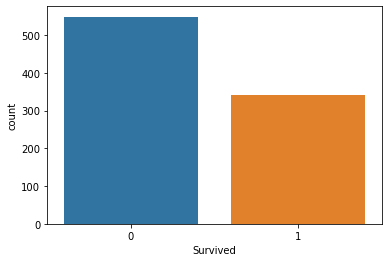

In [3]:
sns.countplot(x = 'Survived', data = titanic_data)

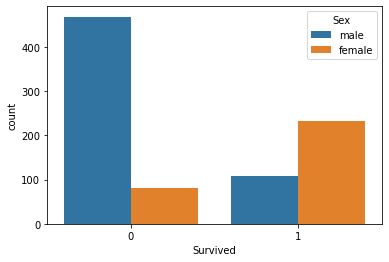

In [4]:
sns.countplot(x ='Survived', hue ='Sex' ,data = titanic_data)

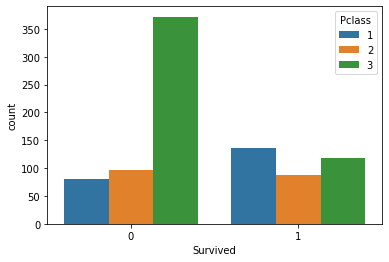

In [5]:
sns.countplot(x ='Survived', hue ='Pclass', data = titanic_data)

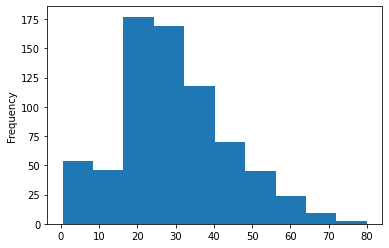

In [6]:
titanic_data['Age'].plot.hist()

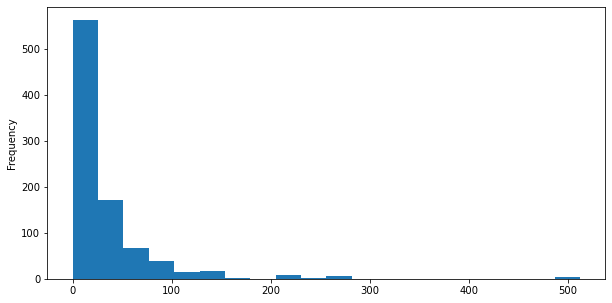

In [7]:
titanic_data['Fare'].plot.hist(bins = 20, figsize =(10,5))

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


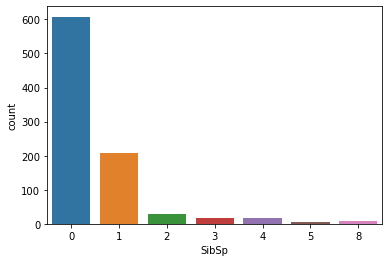

In [9]:
sns.countplot(x ='SibSp', data = titanic_data)

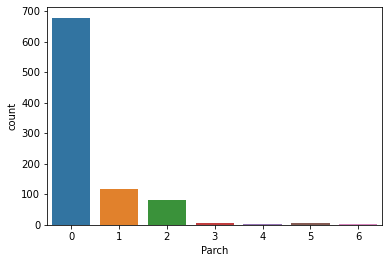

In [10]:
sns.countplot(x = 'Parch', data = titanic_data)

## Data Wrangling

In [11]:
'''Finding out the Null values in the dataset. True = null and False = not null'''
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From above, we can conclude that Age, Cabin and Embarked have Nulls.

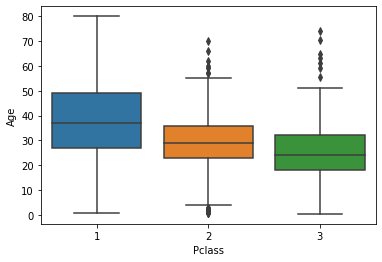

In [13]:
sns.boxplot(x = 'Pclass', y ='Age', data = titanic_data)

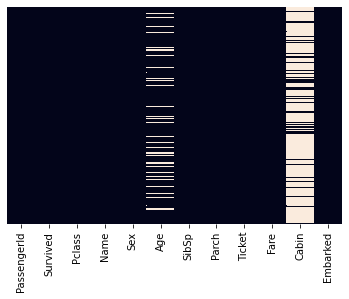

In [14]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar = False)

In [15]:
titanic_data.dropna(inplace = True)

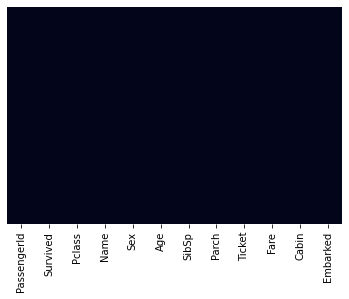

In [16]:
sns.heatmap(titanic_data.isnull(), yticklabels = False, cbar = False)

In [17]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [19]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head(5)

,male
1,0
3,0
6,1
10,0
11,0


In [20]:
embarked = pd.get_dummies(titanic_data['Embarked'], drop_first= True)
embarked.head(5)

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [21]:
pcl = pd.get_dummies(titanic_data['Pclass'], drop_first= True)
pcl.head(5)

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


## Concatenate all the new cleaned columns into the dataset

In [22]:
titanic_data = pd.concat([titanic_data,sex,embarked,pcl],axis = 1)

In [23]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1,0,0


In [24]:
titanic_data.drop(['Sex','Name','Ticket','Embarked','Pclass'],axis = 1,inplace= True)

In [25]:
titanic_data.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,male,Q,S,2,3
1,2,1,38.0,1,0,71.2833,C85,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,C123,0,0,1,0,0
6,7,0,54.0,0,0,51.8625,E46,1,0,1,0,0
10,11,1,4.0,1,1,16.7000,G6,0,0,1,0,1
11,12,1,58.0,0,0,26.5500,C103,0,0,1,0,0
21,22,1,34.0,0,0,13.0000,D56,1,0,1,1,0
23,24,1,28.0,0,0,35.5000,A6,1,0,1,0,0
27,28,0,19.0,3,2,263.0000,C23 C25 C27,1,0,1,0,0
52,53,1,49.0,1,0,76.7292,D33,0,0,0,0,0
54,55,0,65.0,0,1,61.9792,B30,1,0,0,0,0


In [26]:
titanic_data.drop(['Cabin'],axis = 1, inplace = True)

In [27]:
titanic_data.head(5)

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
6,7,0,54.0,0,0,51.8625,1,0,1,0,0
10,11,1,4.0,1,1,16.7000,0,0,1,0,1
11,12,1,58.0,0,0,26.5500,0,0,1,0,0


## Train Data

In [28]:
#independant variable
X = titanic_data.drop('Survived',axis = 1)
#dependant variable
y = titanic_data['Survived']

To install scikit-learn(if not already installed), run the below commands in the Anaconda Prompt
#>>pip install -v scikit-learn
#>>pip install scipy

In [29]:
import sklearn

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()

In [35]:
logmodel.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [38]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.62      0.59      0.61        17\n           1       0.82      0.84      0.83        38\n\n    accuracy                           0.76        55\n   macro avg       0.72      0.72      0.72        55\nweighted avg       0.76      0.76      0.76        55\n'

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix


conf = multilabel_confusion_matrix(y_test, predictions)

In [40]:
confusion_matrix(y_test, predictions)

array([[10,  7],
       [ 6, 32]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, predictions)

0.7636363636363637

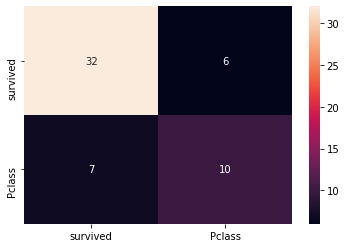

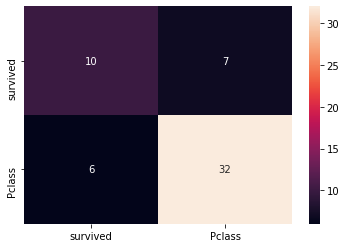

In [43]:
for i, matrix in enumerate(conf):
    tick_labels = ['survived', 'Pclass' ]
    plt.figure()
    sns.heatmap(matrix, annot=True, fmt='d',
                xticklabels=tick_labels,
                yticklabels=tick_labels)
    plt.xticks(rotation=0)